In [10]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from neural_network.NeuralNetwork import NeuralNetwork
from neural_network.DenseLayer import DenseLayer
from neural_network.Activation import ReLU,Sigmoid
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [11]:

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

# Normalize the data
y = y.reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Epoch 0, Loss: 28947.995673788137, R2 Train: -3.764005848848175, R2 Test: -3.838743621714986, MSE Train: 28947.995673788137, MSE Test: 25636.397980012804
Epoch 1, Loss: 28408.95147081025, R2 Train: -3.675294707506544, R2 Test: -3.7310294232153858, MSE Train: 28408.95147081025, MSE Test: 25065.711810892088
Epoch 2, Loss: 27676.572032195454, R2 Train: -3.5547661580188734, R2 Test: -3.5853686894449073, MSE Train: 27676.572032195454, MSE Test: 24293.979139575815
Epoch 3, Loss: 26581.480241094367, R2 Train: -3.3745456081534773, R2 Test: -3.3718626868407853, MSE Train: 26581.480241094367, MSE Test: 23162.791938559996
Epoch 4, Loss: 24869.888810283173, R2 Train: -3.092866984213159, R2 Test: -3.049340936029899, MSE Train: 24869.888810283173, MSE Test: 21454.02276056666
Epoch 5, Loss: 22191.427582354656, R2 Train: -2.652069455446128, R2 Test: -2.5652220430906665, MSE Train: 22191.427582354656, MSE Test: 18889.087401450746
Epoch 6, Loss: 18371.0803360856, R2 Train: -2.0233503955515357, R2 Test: 

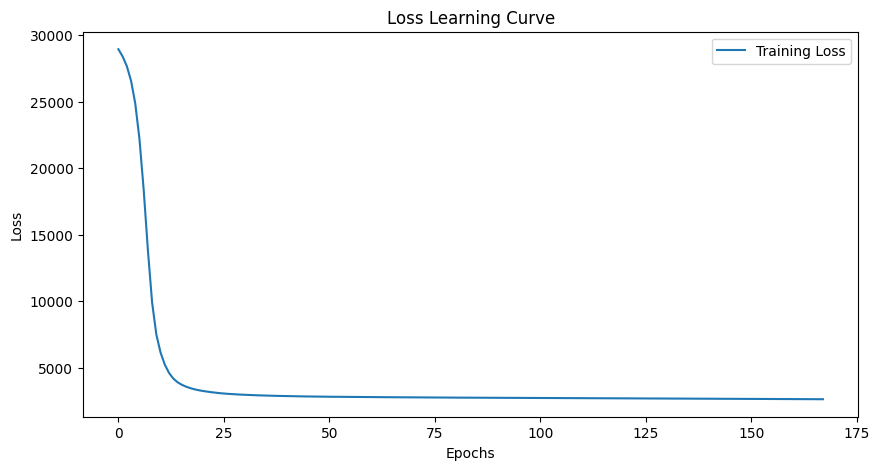

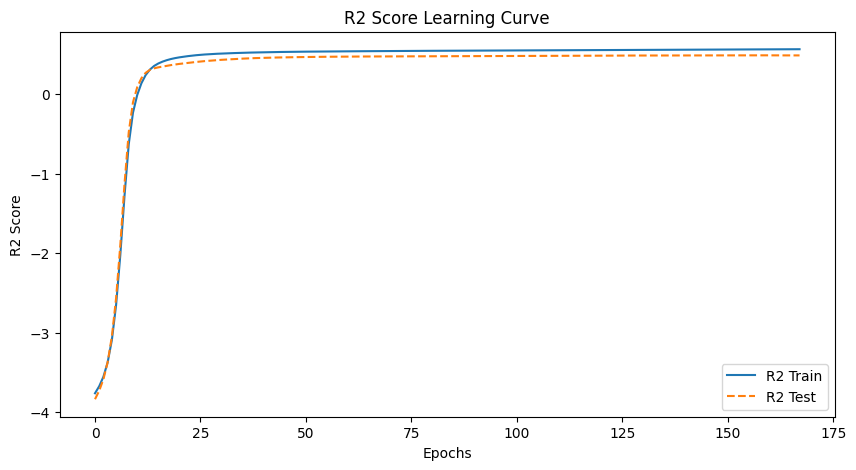

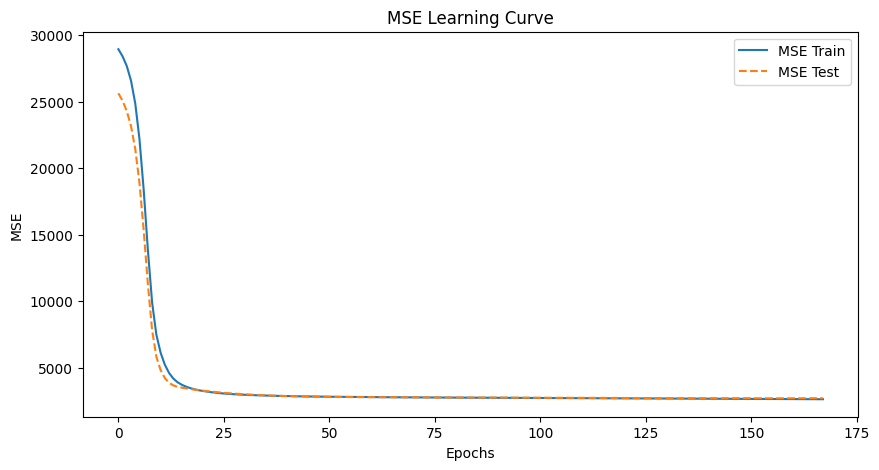

In [15]:

# Set up the neural network for regression
network = NeuralNetwork(
    DenseLayer(X_train.shape[1], 10),
    ReLU(),
    DenseLayer(10, 1)
)

# Method to train and evaluate the network
def train_and_evaluate(network, X_train, y_train, X_test, y_test, epochs, learning_rate, patience=10):
    # Inicializar los contenedores para el historial
    loss_history = []
    r2_history_train = []
    r2_history_test = []
    mse_history_train = []
    mse_history_test = []

    # Mejor MSE de validación y contador de épocas desde la última mejora
    best_mse = np.inf
    epochs_no_improve = 0

    # Entrenar la red y devolver el historial de pérdida
    for epoch in range(epochs):
        network.train(X_train, y_train, epochs=1, learning_rate=learning_rate, loss='mse')
        predicted_train = network.predict(X_train)
        predicted_test = network.predict(X_test)

        # Calcular pérdida, R2 y MSE
        loss_train = network.compute_loss(predicted_train, y_train, 'mse')
        loss_history.append(loss_train)
        r2_train = r2_score(y_train.flatten(), predicted_train.flatten())
        r2_test = r2_score(y_test.flatten(), predicted_test.flatten())
        mse_train = mean_squared_error(y_train.flatten(), predicted_train.flatten())
        mse_test = mean_squared_error(y_test.flatten(), predicted_test.flatten())
        r2_history_train.append(r2_train)
        r2_history_test.append(r2_test)
        mse_history_train.append(mse_train)
        mse_history_test.append(mse_test)

        # Imprimir progreso
        print(f'Epoch {epoch}, Loss: {loss_train}, R2 Train: {r2_train}, R2 Test: {r2_test}, MSE Train: {mse_train}, MSE Test: {mse_test}')

        # Comprobar si el MSE de validación actual es el mejor
        if mse_test < best_mse:
            best_mse = mse_test
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

        # Parada anticipada si no hay mejora durante 'patience' número de épocas
        if epochs_no_improve == patience:
            print(f'Early stopping: MSE no mejora desde la época {epoch - patience}')
            break

    return loss_history, r2_history_train, r2_history_test, mse_history_train, mse_history_test

# Training and evaluation
loss_history, r2_history_train, r2_history_test, mse_history_train, mse_history_test = train_and_evaluate(
    network, X_train, y_train, X_test, y_test, epochs=10000, learning_rate=0.001
)

# Plot the learning curve for loss
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Learning Curve')
plt.legend()
plt.show()

# Plot the learning curves for R2 Score
plt.figure(figsize=(10, 5))
plt.plot(r2_history_train, label='R2 Train')
plt.plot(r2_history_test, label='R2 Test', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('R2 Score Learning Curve')
plt.legend()
plt.show()

# Plot the learning curves for MSE
plt.figure(figsize=(10, 5))
plt.plot(mse_history_train, label='MSE Train')
plt.plot(mse_history_test, label='MSE Test', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE Learning Curve')
plt.legend()
plt.show()